In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 데이터 생성
- 남, 여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140, 195)

141

In [5]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터 data추가
    data.append([random.randint(60, 95), random.randint(160, 195)])
data

[[70, 168],
 [78, 184],
 [48, 157],
 [74, 167],
 [55, 143],
 [83, 162],
 [69, 152],
 [73, 181],
 [47, 166],
 [91, 161],
 [70, 149],
 [61, 163],
 [50, 163],
 [72, 175],
 [62, 162],
 [67, 177],
 [65, 140],
 [71, 169],
 [45, 152],
 [62, 170],
 [51, 166],
 [78, 162],
 [62, 145],
 [95, 169],
 [65, 161],
 [60, 177],
 [44, 158],
 [63, 162],
 [64, 144],
 [84, 180],
 [70, 146],
 [69, 179],
 [51, 150],
 [64, 170],
 [68, 146],
 [67, 171],
 [49, 170],
 [78, 188],
 [43, 140],
 [83, 165],
 [54, 142],
 [61, 167],
 [61, 148],
 [77, 174],
 [40, 163],
 [64, 189],
 [52, 165],
 [70, 163],
 [58, 142],
 [67, 171],
 [65, 159],
 [87, 165],
 [44, 159],
 [95, 162],
 [64, 153],
 [60, 188],
 [52, 147],
 [63, 195],
 [47, 147],
 [79, 191],
 [67, 145],
 [70, 181],
 [52, 161],
 [63, 167],
 [64, 143],
 [83, 179],
 [48, 164],
 [89, 187],
 [46, 147],
 [74, 175],
 [44, 154],
 [74, 171],
 [58, 164],
 [88, 194],
 [56, 160],
 [87, 170],
 [56, 143],
 [63, 165],
 [48, 148],
 [73, 170],
 [68, 151],
 [60, 177],
 [52, 166],
 [90

In [10]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')
print('여자 : ', [female for female in data[::2]])
print('남자 : ', [male for male in data[1::2]])
print('=============================================')
print('여자 몸무게(x축) :',[female[0] for female in data[::2]])
print('여자 키(y축) :',[female[1] for female in data[::2]])

print('남자 몸무게(x축) : ', [male[0] for male in data[1::2]])
print('남자 키(y축) : ', [male[1] for male in data[1::2]])

여자 :  [[70, 168], [48, 157], [55, 143], [69, 152], [47, 166], [70, 149], [50, 163], [62, 162], [65, 140], [45, 152], [51, 166], [62, 145], [65, 161], [44, 158], [64, 144], [70, 146], [51, 150], [68, 146], [49, 170], [43, 140], [54, 142], [61, 148], [40, 163], [52, 165], [58, 142], [65, 159], [44, 159], [64, 153], [52, 147], [47, 147], [67, 145], [52, 161], [64, 143], [48, 164], [46, 147], [44, 154], [58, 164], [56, 160], [56, 143], [48, 148], [68, 151], [52, 166], [59, 147], [54, 169], [68, 156], [65, 168], [44, 169], [44, 141], [58, 154], [47, 144]]
남자 :  [[78, 184], [74, 167], [83, 162], [73, 181], [91, 161], [61, 163], [72, 175], [67, 177], [71, 169], [62, 170], [78, 162], [95, 169], [60, 177], [63, 162], [84, 180], [69, 179], [64, 170], [67, 171], [78, 188], [83, 165], [61, 167], [77, 174], [64, 189], [70, 163], [67, 171], [87, 165], [95, 162], [60, 188], [63, 195], [79, 191], [70, 181], [63, 167], [83, 179], [89, 187], [74, 175], [74, 171], [88, 194], [87, 170], [63, 165], [73, 17

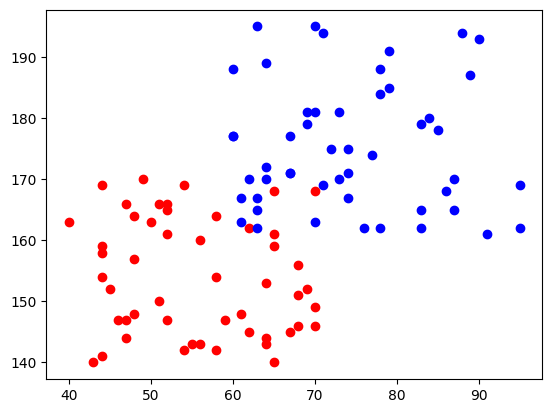

In [19]:
plt.plot([female[0] for female in data[::2]],
         [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
         [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [20]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[57, 183], [60, 146]]

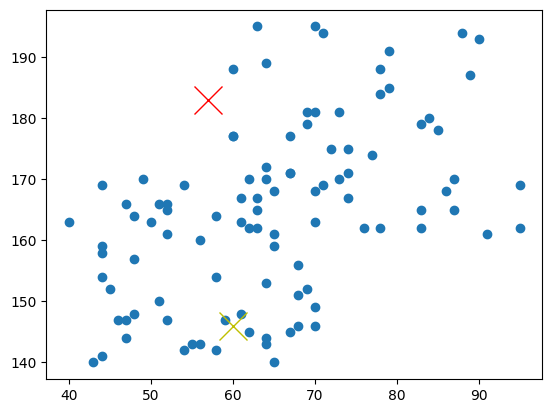

In [23]:
plt.plot([d[0] for d in data], 
         [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=20) # 기준점0(random_points[0])
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='y', markersize=20) # 기준점1(random_points[1])

In [26]:
# 두 점 거리를 return / a : [0,0]
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dist([0,0], [3,4]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[1]))

5.0
19.849433241279208
42.04759208325728


In [27]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(50, 50)

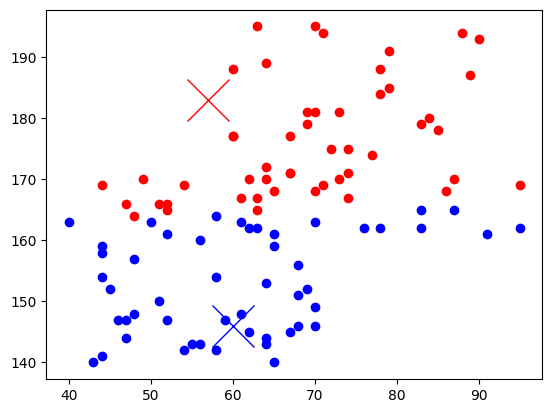

In [32]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=30)

In [61]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX =np.mean([d[0] for d in group0])
group0_meanY =np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX,group0_meanY]

group1_meanX =np.mean([d[0] for d in group1])
group1_meanY =np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX,group0_meanY]
random_points

[[55.83018867924528, 154.43396226415095],
 [75.19148936170212, 154.43396226415095]]

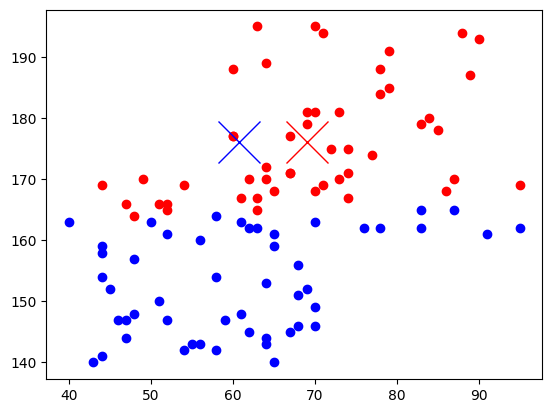

In [42]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r')
plt.plot(random_points[0][0],
         random_points[0][1], 'x', color='r', markersize=30)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b')
plt.plot(random_points[1][0],
         random_points[1][1], 'x', color='b', markersize=30)

# 3. 군집화 전체 코드(for문 이용)
- 랜덤 포인트 2개 지정
- for문 
    * 랜덤포인트 2지점 기준으로 group0과 group1 나눔
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
    * 랜덤포인트 출력과 시각화

초기 기준점 : [[54, 193], [94, 181]]
1 번째 points : [(56.41379310344828, 163.27586206896552), (76.69047619047619, 166.38095238095238)]
2 번째 points : [(55.660714285714285, 157.21428571428572), (76.72727272727273, 173.95454545454547)]
3 번째 points : [(55.94444444444444, 154.72222222222223), (75.47826086956522, 176.15217391304347)]
4 번째 points : [(55.83018867924528, 154.43396226415095), (75.19148936170212, 176.0212765957447)]
5 번째 points : [(55.83018867924528, 154.43396226415095), (75.19148936170212, 176.0212765957447)]
6 번째 points : [(55.83018867924528, 154.43396226415095), (75.19148936170212, 176.0212765957447)]
7 번째 points : [(55.83018867924528, 154.43396226415095), (75.19148936170212, 176.0212765957447)]
8 번째 points : [(55.83018867924528, 154.43396226415095), (75.19148936170212, 176.0212765957447)]
9 번째 points : [(55.83018867924528, 154.43396226415095), (75.19148936170212, 176.0212765957447)]


(140.0, 195.0)

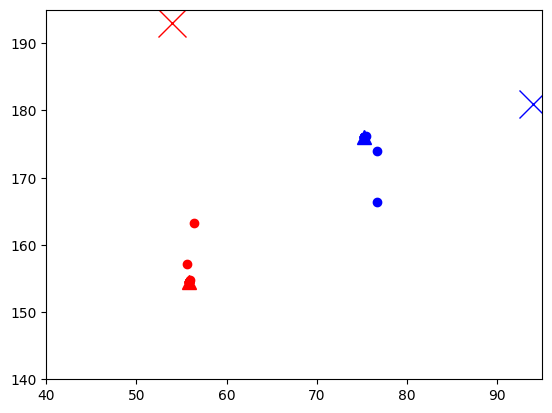

In [59]:
points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1,10):
    # 랜덤포인트 2지점 기준으로 group0과 group1 나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = group0_mean_X,group0_mean_Y
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = group1_mean_X,group1_mean_Y
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1],'o', color='r')
    plt.plot(points[1][0], points[1][1],'o', color='b')

plt.plot(points[0][0], points[0][1],'^', color='r', markersize=10)
plt.plot(points[1][0], points[1][1],'^', color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

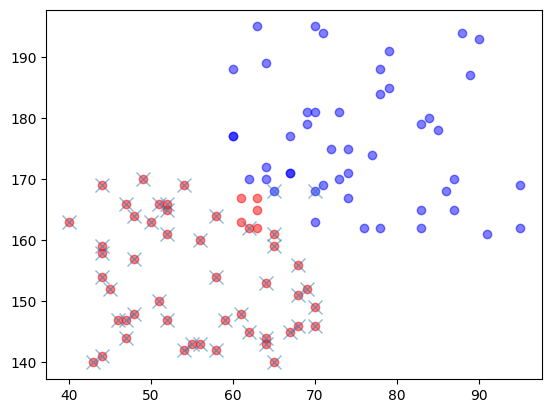

In [60]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', alpha=0.5, markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측)
    * 변환모델 : 전처리시 사용 ex. 인코딩, 스케일 조정 - fit(학습), transform(변환함수), fit_transform(학->변)

In [ ]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [70]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2,  # 2개 그룹으로 군집
               init='random', # 초기 기준점을 random하게
               n_init=10,     # 10번 실행
               random_state=7) # random 결과를 일괄적으로 맞추기 위한 seed
model.fit(data)

,n_clusters,2
,init,'random'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


In [71]:
# 기준점(중심점)
model.cluster_centers_

array([[ 75.19148936, 176.0212766 ],
       [ 55.83018868, 154.43396226]])

In [72]:
# 나눠진 그룹들의 인덱스
model.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [74]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

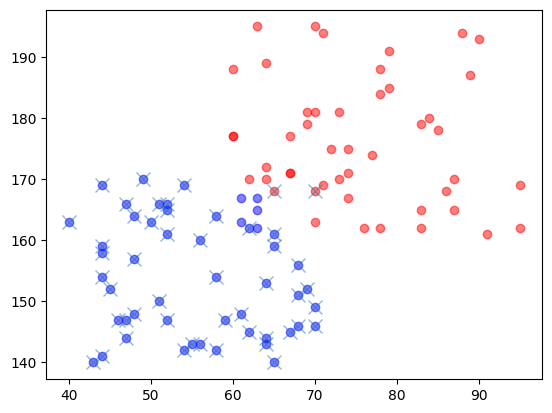

In [76]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', alpha=0.5, markersize=10)